In [16]:
import cv2
import os
import numpy as np
import json
from matplotlib import pyplot as plt
path = os.path.join(os.path.dirname("__file__"), "data" )
path_json = os.path.join(path,'annnotations-public')
path_target = os.path.join(path, 'public-targets')

In [17]:


def convert_jpeg(img_folder = "public-images"):
    path_image = os.path.join(os.path.dirname("__file__"), "data" ,img_folder)
    for image in os.listdir(path_image):
        extension = os.path.splitext(image)[1]
        if extension == ".jpeg":
            continue
        image_path = os.path.join(path_image, image)
        new_name = image.replace(extension, ".jpeg")
        image_path_new = os.path.join(path_image, new_name)
        os.rename(image_path, image_path_new)
#convert_jpeg()
        



In [18]:
def convert_data(annotation_folder, target_folder, type="bb"):
        path_image = os.path.join(os.path.dirname("__file__"), "data" ,'public-images')
        files_anno = os.listdir(annotation_folder)
        for file in files_anno:
                path_json = os.path.join(annotation_folder, file)
                image_file = file.replace(".json",".jpeg")
                img = cv2.imread(os.path.join(path_image, image_file))
                txt_file = file.replace(".json",".txt")
                try:
                        with open(path_json) as json_file:
                                data = json.load(json_file)
                        if data["annotations"] == []:
                                bm = np.zeros(img.shape[0:2])
                                bm = np.int8(bm)
                                print('null:',path_json)
                        else:       
                                box = data["annotations"][0]["bounding_box"]
                                x,y,w,h = int(box["x"]),int(box["y"]),int(box["w"]),int(box["h"])
                                bm = np.zeros(img.shape[0:2])
                                bm[y:y+h,x:x+w] = 1
                                bm = np.int8(bm)
                        np.savetxt(os.path.join(target_folder, txt_file), bm, fmt = '%s')
                except:
                        print(path_json)

# convert_data(path_json,path_target)

In [19]:
annotation_folder = './data/public-annotation'
target_folder = './data/public-target'
convert_data(annotation_folder,target_folder)

./data/public-annotation/images - 2021-09-06T123125.238.json
./data/public-annotation/images - 2021-09-07T085934.324.json
null: ./data/public-annotation/P1010851.json
./data/public-annotation/P1010851.json
./data/public-annotation/P1000781.json
./data/public-annotation/SR17_SB_Deer_Oct2014.json
./data/public-annotation/G0062152.json
./data/public-annotation/P1000806.json
./data/public-annotation/DSC_0012.json
./data/public-annotation/P1000555.json
./data/public-annotation/images (92).json
./data/public-annotation/image482.json
./data/public-annotation/E24515EC-45AC-4787-9534-8826652AD74F.json
./data/public-annotation/P1010739.json
./data/public-annotation/mic%2523542_0252.json
./data/public-annotation/download - 2021-09-07T085923.628.json
./data/public-annotation/DSC_0511.json
./data/public-annotation/Comp_BlackTailedJackrabbit_CAHWY190_MM_129_50_FacingEast_20120603.json
./data/public-annotation/IMG_20160405_100100.json
./data/public-annotation/D69E533E-B63B-4BE7-A90C-C4CFBC2DBE9C.json

[ WARN:0@1234.453] global /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('data/public-images/CAQU%281000px%29.jpg.jpeg'): can't open/read file: check file path/integrity


./data/public-annotation/IMG_2221.json
./data/public-annotation/60065579_2217842451635221_5183770048732332032_n.json
./data/public-annotation/20120404%202.json
./data/public-annotation/P1010721.json
./data/public-annotation/P1010371.json
null: ./data/public-annotation/IMG_0836.json
./data/public-annotation/IMG_0836.json
./data/public-annotation/DSC_0323.json
./data/public-annotation/E2042316-8D26-4C02-A8BA-12762E5F0CD6.json
./data/public-annotation/IMG_2029%20%281%29.json
./data/public-annotation/doe.carcass.json
./data/public-annotation/mic%2523560_0419.json
./data/public-annotation/DSC_0509.json
./data/public-annotation/P1000737.json
./data/public-annotation/P1010737.json
./data/public-annotation/EF21CAFC-9180-417A-AD7A-4CEDC5D308F7.json
./data/public-annotation/MIC%2523097_1845%20str%20skunk%20exit%20120.json
./data/public-annotation/P1010449.json
./data/public-annotation/IMG_3534.json
./data/public-annotation/mic%25231858-d8158-cgs-59.json
./data/public-annotation/gettyimages-98204

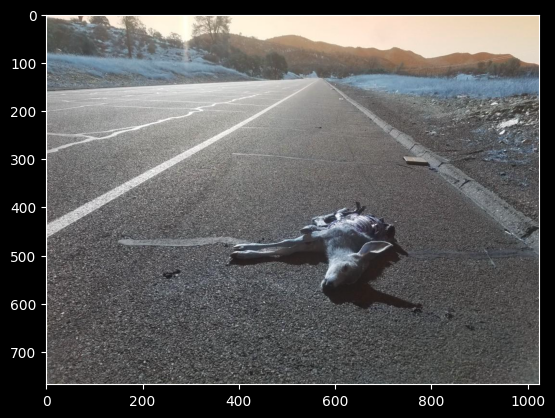

In [20]:

jpg = cv2.imread(os.path.join(path,'public-images',"Deer02.jpeg"))
plt.imshow(jpg)


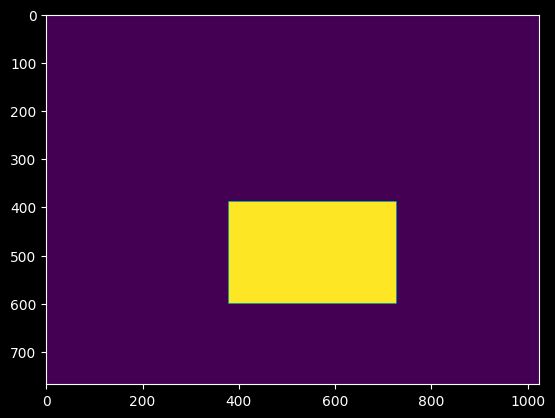

In [21]:
imported = np.loadtxt(os.path.join(path_target, "Deer02.txt"))
plt.imshow(imported)

379 389 349 212


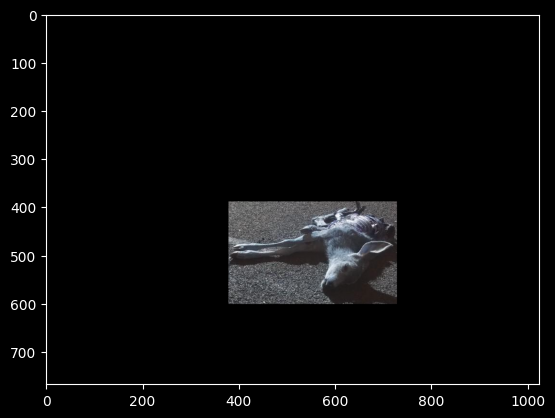

In [42]:

img = cv2.imread(os.path.join(path, "public-images","Deer02.jpeg"))
path_json = os.path.join(path, "public-annotation","Deer02.json")
with open(path_json) as json_file:
        data = json.load(json_file)
mask = np.zeros(img.shape[:2], dtype="uint8")
box = data["annotations"][0]["bounding_box"]
x,y,w,h = int(box["x"]),int(box["y"]),int(box["w"]),int(box["h"])
cv2.rectangle(mask,(x, y), (x+w, y+h),  255, -1)
# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img)
plt.imshow(masked)

Dataloader:

output = Image and mask
where mask is a matrix